## 1.	Download the mammography dataset given. Implement PCA. Find the first two principal components of the dataset and plot it using scatter plot with different colors for each target.  Dataset is obtained from https://www.openml.org/d/310 What are your interpretations?
    


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from google.colab import files
uploaded = files.upload()

Saving phpn1jVwe.csv to phpn1jVwe.csv


In [3]:
# Load the Dataset
df_data = pd.read_csv("phpn1jVwe.csv")

In [4]:
df_data.head(5)

,attr1,attr2,attr3,attr4,attr5,attr6,class
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,'-1'
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,'-1'
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,'-1'
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,'-1'
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,'-1'


In [5]:
# Seperating the features and target columns
df_features = df_data[df_data.columns[:5]]
df_target = df_data[df_data.columns[6]]

In [6]:
df_features.head(5)

,attr1,attr2,attr3,attr4,attr5
0,0.230020,5.072578,-0.276061,0.832444,-0.377866
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866


In [7]:
df_target.head(2)

0    '-1'
1    '-1'
Name: class, dtype: object

In [8]:
df_features.describe() 
# data is standadized

,attr1,attr2,attr3,attr4,attr5
count,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04
mean,1.096535e-10,1.297595e-09,5.698113e-10,-2.435705e-09,-1.120680e-09
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01
25%,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01
50%,-1.085769e-01,-3.949941e-01,-2.309790e-01,-8.595525e-01,-3.778657e-01
75%,3.139489e-01,-7.649473e-02,2.198366e-01,8.202077e-01,-3.778657e-01
max,3.150844e+01,5.085849e+00,2.947777e+01,9.591164e+00,2.361712e+01


In [9]:
# Make an instance of PCA
pca = PCA(n_components=2)
print(pca)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [17]:
principalComponents = pca.fit_transform(df_features)

principalDf = pd.DataFrame(data = principalComponents, columns = ['pc_1', 'pc_2'])

In [18]:
principalDf.head(5)

,pc_1,pc_2
0,2.736372,2.874728
1,-0.524351,0.146989
2,-0.201428,-2.521152
3,-0.396001,0.950692
4,0.167044,-0.304127


In [19]:
print((pca.explained_variance_ratio_))
#[0.36013997 0.22577113 0.19901983 0.11863644 0.09643263]
#0.585911094389204

[0.36013997 0.22577113]


In [20]:
finalDf = pd.concat([principalDf, df_target], axis = 1)

In [14]:
finalDf.head(5)

,pc_1,pc_2,class
0,2.736372,2.874728,'-1'
1,-0.524351,0.146989,'-1'
2,-0.201428,-2.521152,'-1'
3,-0.396001,0.950692,'-1'
4,0.167044,-0.304127,'-1'


In [15]:
df_target.unique()

array(["'-1'", "'1'"], dtype=object)

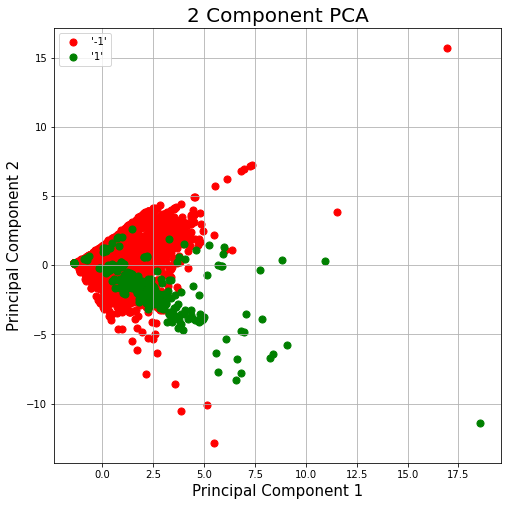

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8));
targets = df_target.unique()
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc_1'], finalDf.loc[indicesToKeep, 'pc_2'], c = color, s = 50)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)    
ax.legend(targets)
ax.grid()

OBSERVATION: 
1) 59 % of information is compressed into the principal components  1 and 2 
2) With only the 1st two principal components we are able to somewhat distingush the data.


##2.	Download the image “bird.png”. Apply PCA and find the optimal number of components required to compress it to reconstruct the original image with less errors. Plot following graphs. 
a.	Graph with ‘x’ axis to be number of PCs and ‘y’ axis to be the reconstruction error.

b.	Graph with ‘x’ axis to be number of PCs and ‘y’ axis to be the sum of eigen values.What are your conclusions?


In [41]:
from pylab import imread,subplot,imshow,title,gray,figure,show,NullLocator
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from numpy import size,mean
import numpy as np

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
input_file = open("/content/gdrive/MyDrive/Project/bird.png","r")

(256, 349, 4)


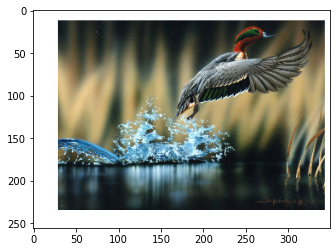

In [28]:
A = plt.imread("/content/gdrive/MyDrive/Project/bird.png")
print(A.shape)
plt.imshow(A)


(256, 349)


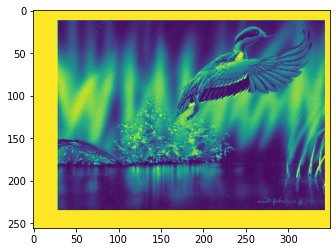

In [32]:
A_0 = A[:, :, 0]
print(A_0.shape)
plt.imshow(A_0)

(256, 349)


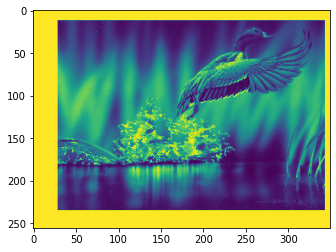

In [30]:
A_1 = A[:, :, 1]
print(A_1.shape)
plt.imshow(A_1)

(256, 349)


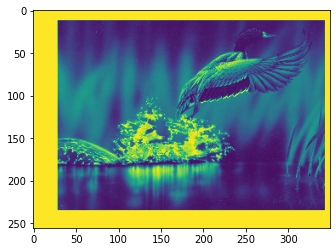

In [31]:
A_2 = A[:, :, 2]
print(A_2.shape)
plt.imshow(A_2)

In [33]:
pca = PCA(70)

In [34]:
principalComponents = pca.fit_transform(A_0)

In [35]:
#print(pca.explained_variance_ratio_)

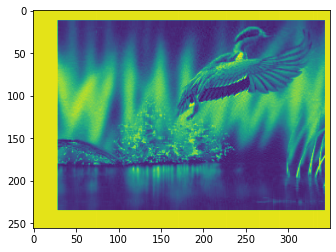

In [36]:
pca_image  = pca.inverse_transform(principalComponents)
plt.imshow(pca_image)
plt.show()


In [37]:
pca_loss = ((A_0 - pca_image) ** 2).mean() # MSE
pca_loss

0.00055416266

In [42]:
df = pd.DataFrame(columns = ['Loss', 'Sum_Eigen_Values'])
df.insert(loc=0, column='PC_Number', value=np.arange(1,257))

In [43]:
for i in range(1,257,1):
  pca = PCA(i) 
  principalComponents = pca.fit_transform(A_0) # Apply PCA on data
  pca_image  = pca.inverse_transform(principalComponents) # Reconstruct image with PCA
  pca_loss = ((A_0 - pca_image) ** 2).mean() # Calculate loss 
  df["Loss"][i-1] = pca_loss 
  df["Sum_Eigen_Values"][i-1] = sum(pca.explained_variance_)
  
  

In [44]:
df.head()

,PC_Number,Loss,Sum_Eigen_Values
0,1,0.0180043,24.3891
1,2,0.0139901,25.7956
2,3,0.010812,26.9091
3,4,0.00909526,27.5106
4,5,0.00795072,27.9116


a.	Graph with ‘x’ axis to be number of PCs and ‘y’ axis to be the reconstruction error.

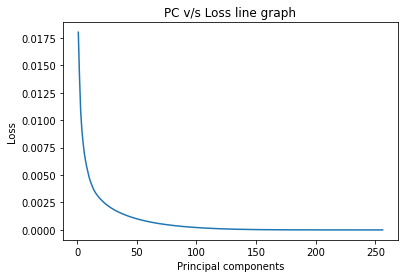

In [46]:
# x axis values
x = df['PC_Number']
# corresponding y axis values
y = df['Loss']
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Principal components')
# naming the y axis
plt.ylabel('Loss')
  
# giving a title to my graph
plt.title('PC v/s Loss line graph')
  
# function to show the plot
plt.show()

b. Graph with ‘x’ axis to be number of PCs and ‘y’ axis to be the sum of eigen values.What are your conclusions?

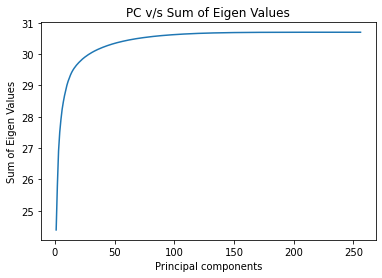

In [47]:
# x axis values
x = df['PC_Number']
# corresponding y axis values
y = df['Sum_Eigen_Values']
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Principal components')
# naming the y axis
plt.ylabel('Sum of Eigen Values')
  
# giving a title to my graph
plt.title('PC v/s Sum of Eigen Values')
  
# function to show the plot
plt.show()

OBSERVATION :
1) Image recunstruction error decreses as the number of principle components increases.
2) The loss fattens around, when the number of principle component is 100 in this scenario.
3) The first 100 eigen values contribute maximum to the to total sum of all the eigen values in our example

## 3.	Perform Latent Semantic Indexing (LSI) on the following set of Documents.
d1: Shipment of gold damaged in a fire. 
d2: Delivery of silver arrived in a silver truck. 
d3: Shipment of gold arrived in a truck.

Use Latent Semantic Indexing (LSI) to rank these documents for the query 
“gold silver truck.”
State your observations.


In [48]:
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning,
module="pandas", lineno=570)
import numpy

In [49]:
example = ['Shipment of gold damaged in a fire' , 'Delivery of silver arrived in a silver truck' , 'Shipment of gold arrived in a truck']

vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example)
pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names
()).head(10)

,arrived,damaged,delivery,gold,shipment,silver,truck
Shipment of gold damaged in a fire,0,1,0,1,1,0,0
Delivery of silver arrived in a silver truck,1,0,1,0,0,2,1
Shipment of gold arrived in a truck,1,0,0,1,1,0,1


In [ ]:
# Get words that correspond to each column
vectorizer.get_feature_names()

['arrived', 'damaged', 'delivery', 'gold', 'shipment', 'silver', 'truck']

In [50]:
# Fit LSA.
lsa = TruncatedSVD(2, algorithm = 'arpack') # Return 2 dim data 
dtm = dtm.astype(float)
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [51]:
df_term = pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns = vectorizer.get_feature_names())
df_term

,arrived,damaged,delivery,gold,shipment,silver,truck
component_1,0.469809,0.067207,0.295892,0.241124,0.241124,0.591784,0.469809
component_2,0.036554,0.310765,-0.223350,0.570669,0.570669,-0.446700,0.036554


In [ ]:
df_doc = pd.DataFrame(dtm_lsa, index = example, columns = ["component_1","component_2"])
df_doc

,component_1,component_2
Shipment of gold damaged in a fire,0.353898,0.935284
Delivery of silver arrived in a silver truck,0.918195,-0.396129
Shipment of gold arrived in a truck,0.760391,0.649466


In [ ]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys

([0.35389846513661666, 0.9181950424290773, 0.7603906169668817],
 [0.9352838480236612, -0.3961285953559332, 0.649466018840651])

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Plot of points against LSA principal components')

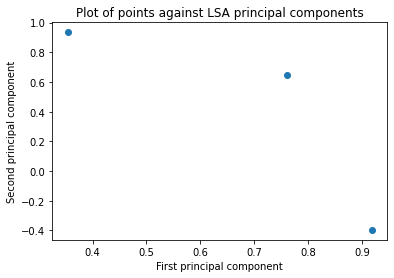

In [ ]:
# Plot scatter plot of points
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(xs,ys)
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')

In [ ]:
def Query_Ranking(query = q1, doc_df = df_doc , term_df = df_term):
  """
  This function ranks the passed documents as per the cosine similarity with the query provided.
  """
  concept_term = []
  query_word = query.split()
  #print(query_word)
  # Get the query word in the conceputal space
  for i in range(0,len(query_word)):
    concept_term.append(term_df[query_word[i]])

  query_doc_con = 0
  for i in range(0,len(concept_term)):  
    query_doc_con =  query_doc_con +  concept_term[i]  
    #print(concept_term[i] )

  query_doc_con = query_doc_con / len(query_word)
  #print(query_doc_con)
  xs.append(query_doc_con[0])
  ys.append(query_doc_con[1])
  query_doc_array = np.array([query_doc_con[0],query_doc_con[1]])
  query_doc_array = query_doc_array.reshape(1,-1)
  
  sim ={}
  # Calculate cosine similarity of docs
  for i in range(0, len(doc_df)):
    b = doc_df.iloc[i]
    doc_array = np.array([b[0],b[1]])
    doc_array = doc_array.reshape(1,-1)
    csim = cosine_similarity(query_doc_array,doc_array)
    sim[doc_df.index[i]] = csim
    sim_rank_df = pd.DataFrame(list(sim_dic.items()),columns = ['Documents', 'Similarity'] )
    sim_rank_df = sim_rank_df.sort_values("Similarity", ascending=False)
 
  return (sim_rank_df)


In [ ]:
q1 = "gold silver truck"

In [ ]:
result = Query_Ranking(q1) # Call the function to find the similarity between the query and the documents
print("The document ranked as per the query: "+q1+"\n")
result.head()

The document ranked as per the query: gold silver truck



,Documents,Similarity
1,Delivery of silver arrived in a silver truck,[[0.86285718223352]]
2,Shipment of gold arrived in a truck,[[0.834110674490228]]
0,Shipment of gold damaged in a fire,[[0.46562458825840286]]


Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Plot of points against LSA principal components')

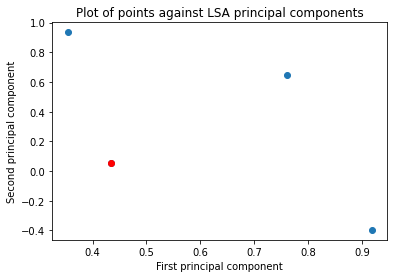

In [ ]:
# Plot scatter plot of points
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(xs,ys)
plt.plot(xs[3],ys[3],'ro')
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')


OBSERVATIONS :
1) Query is most similar to document "Delivery of silver arrived in a silver truck"